In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns  # Import seaborn
import math
import os
os.chdir('/MDL_img')
sns.set_style('darkgrid')  # Use seaborn to set the style
def F_fun(x):
    if x<=0:
        return 1-2*x
    elif 0< x <1:
        return 1-x
    else:
        return 0

def f(x):
    if x<=0:
        return -x
    else:
        return 0
def f2(x):
    if x<=0:
        return x**2
    elif 0<x<1:
        return 0
    else:
        return (x-1)**2
    
def g_star(y):
    if -1<=y<=0:
        return y
    else:
        return 1e8
    
def g_star2(y):
    if -1<=y<=0:
        return 0
    else:
        return 1e8
    
def prox_f(x):
    if x>0:
        return x
    elif x<-1:
        return x+1
    else:
        return 0
    
def prox_f2(x):
    if x<=0:
        return x/3
    elif x>=1:
        return (x+2)/3
    else:
        return x
    
def prox_gstar(x):
    if x<0:
        return -1
    elif x>1:
        return 0 
    else:
        return x-1
    
def prox_gstar2(x):
    if -1<=x<=0:
        return x
    elif x<-1:
        return -1 
    else:
        return 0
    
def Halpern_PPP_method(x0, y0,x_a, y_a, N):
    x, y = x0,y0
    x_cor =[]
    y_cor =[]
    res = []
    for k in range(N):
        x_cor.append(x0)
        y_cor.append(y0)
        mu = 1/(k+2)
        x = mu*x_a+ (1-mu)*prox_f(x0-y0)
        y = mu*y_a + (1-mu)*prox_gstar(2*(x-mu*x_a)/(1-mu)-x0+y0)
        x0, y0 = (x, y)
#         ax.plot(x, y, color='blue', alpha=0.1)
#         print(x,y)
        c = (x-y-(x_a-y_a))**2
        # x_cor.append(x)
        # y_cor.append(y)
        res.append(c)
    print(x,y)
    return x_cor,y_cor
    
        
def PPP_method(x0, y0, N):
    x_cor =[]
    y_cor =[]
    for k in range(N):
        x_cor.append(x0)
        y_cor.append(y0)
        x = prox_f(x0-y0)
        y = prox_gstar(2*x-x0+y0)
        x0, y0 = (x, y)
    print(x,y)
    return x_cor,y_cor

def relaxed_PPP_method(x0, y0, N, lam=0.5):
    x_cor =[]
    y_cor =[]
    for k in range(N):
        x_cor.append(x0)
        y_cor.append(y0)
        d = prox_f(x0-y0)
        x = lam*d + (1-lam)*x0 
        y = lam*prox_gstar(2*d-x0+y0)+(1-lam)*y0
        x0, y0 = (x, y)
    print(x,y)
    return x_cor,y_cor

def select_HPPP_points(x_cor,y_cor, start=12, every=200):
    x_cor = np.array(x_cor)
    y_cor = np.array(y_cor)
    # 保留前12个点
    x_selected = x_cor[:start]
    y_selected = y_cor[:start]

    # 从第13个点开始，每隔200个点取一个点
    x_sparse = x_cor[start::every]
    y_sparse = y_cor[start::every]

    # 将前12个点和稀疏点组合起来
    x_final = np.concatenate((x_selected, x_sparse))
    y_final = np.concatenate((y_selected, y_sparse))
    return x_final, y_final

3.0029970029970006 0.008991008991008992
1.0 -1.1102230246251565e-16


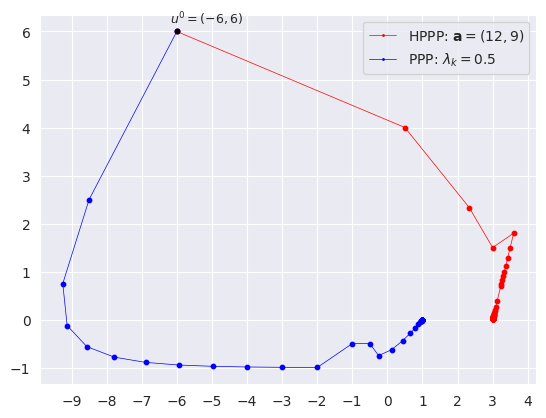

In [4]:
x0, y0 =(-6,6)
# x0, y0 =(10,-10)
N= 1000
n=10
x, y = x0,y0
# x_cor,y_cor = Halpern_PPP_method(x0, y0,16,10, N)
x_cor,y_cor = Halpern_PPP_method(x0, y0,12,9, N)
# x_cor1, y_cor1 = PPP_method(x0, y0, N)
x_cor1, y_cor1 = relaxed_PPP_method(x0, y0, N, lam=0.5)
x_cor, y_cor = select_HPPP_points(x_cor, y_cor, start=12, every=10)
x_cor1, y_cor1 = select_HPPP_points(x_cor1, y_cor1, start=60, every=10)
# x_cor = np.array(x_cor)
# y_cor = np.array(y_cor)
# x_cor1 = np.array(x_cor1)
# y_cor1 = np.array(y_cor1)
# x_cor = x_cor[::n]
# y_cor = y_cor[::n]
# x_cor1 = x_cor1[::n]
# y_cor1 = y_cor1[::n]
fig = plt.figure(1)
# plt.xticks(np.arange(0, 1000, step=100))
plt.xticks(range(-10, 10))
# 标记初始点u^0 = (-6, 6)
plt.scatter(-6, 6, color='black', s=10, zorder=5)  # zorder=5确保点在最上层
plt.annotate(r'$u^0 = (-6,6)$', xy=(-6, 6), xytext=(-5, 6),
             fontsize=9, textcoords='offset points')
plt.scatter(x_cor, y_cor, color='red', s=10)
plt.plot(x_cor,y_cor, color='red', linewidth=0.5, marker='o', label=r'HPPP: $\mathbf{a}=(12,9)$', markersize=1)
plt.scatter(x_cor1, y_cor1, color='blue',s=10)
plt.plot(x_cor1, y_cor1, color='blue', linewidth=0.5, marker='o', label=r'PPP: $\lambda_k=0.5$',markersize=1)
# plt.xlabel(r'$x$', fontdict={'fontname': 'Times New Roman', 'fontsize': 12})  # X轴标签
# plt.ylabel(r'$y$', fontdict={'fontname': 'Times New Roman', 'fontsize': 12})  # Y轴标签
plt.legend()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# plt.savefig('./results/trajectory_case4.pdf', format='pdf',bbox_inches='tight')
plt.show()
# plt.plot(x_cor, y_cor)
# plt.show()
# fig = plt.figure(2)
# plt.plot(range(N), res)
# plt.show()

3.0069930069930115 0.008991008991008992
1.7999999999999985 2.7680218248626613e-97
[0.         0.648      1.06272    1.3281408  1.49801011 1.60672647
 1.67630494 1.72083516 1.7493345  1.76757408 1.77924741 1.78671834
 1.79149974 1.79455983 1.79651829 1.79777171 1.79857389 1.79908729
 1.79941587 1.79962615 1.79976074 1.79984687 1.799902   1.79993728
 1.79995986 1.79997431 1.79998356 1.79998948 1.79999327 1.79999569
 1.80000037 1.8        1.8        1.8        1.8        1.8
 1.8        1.8        1.8        1.8        1.8        1.8
 1.8        1.8        1.8        1.8        1.8        1.8
 1.8        1.8        1.8        1.8        1.8        1.8
 1.8        1.8        1.8        1.8        1.8        1.8
 1.8        1.8        1.8        1.8        1.8        1.8
 1.8        1.8        1.8        1.8        1.8        1.8
 1.8        1.8        1.8        1.8        1.8       ] [-1.80000000e+00 -1.15200000e+00 -7.37280000e-01 -4.71859200e-01
 -3.01989888e-01 -1.93273528e-01 -1.23695

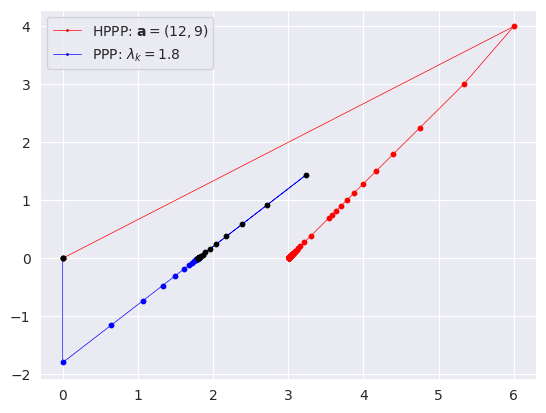

In [86]:
x0, y0 =(0,0)
# x0, y0 =(2,2)
N= 1000
n=10
x, y = x0,y0
# x_cor,y_cor = Halpern_PPP_method(x0, y0,16,10, N)
x_cor,y_cor = Halpern_PPP_method(x0, y0,12,9, N)
# x_cor1, y_cor1 = PPP_method(x0, y0, N)
x_cor1, y_cor1 = relaxed_PPP_method(x0, y0, N, lam=1.8)
x_cor, y_cor = select_HPPP_points(x_cor, y_cor, start=12, every=10)
x_cor1, y_cor1 = select_HPPP_points(x_cor1, y_cor1, start=60, every=10)
# x_cor = np.array(x_cor)
# y_cor = np.array(y_cor)
# x_cor1 = np.array(x_cor1)
# y_cor1 = np.array(y_cor1)
# x_cor = x_cor[::n]
# y_cor = y_cor[::n]
# x_cor1 = x_cor1[::n]
# y_cor1 = y_cor1[::n]
fig = plt.figure(1)
# plt.xticks(np.arange(0, 1000, step=100))
plt.xticks(range(-10, 10))
# 标记初始点u^0 = (-6, 6)
plt.scatter(-0, 0, color='black', s=10, zorder=5)  # zorder=5确保点在最上层
# plt.annotate(r'$u^0 = (-0,0)$', xy=(0, 0), xytext=(6, -6),
#              fontsize=9, textcoords='offset points')
plt.scatter(x_cor, y_cor, color='red', s=10)
plt.plot(x_cor,y_cor, color='red', linewidth=0.5, marker='o', label=r'HPPP: $\mathbf{a}=(12,9)$', markersize=1)
# plt.scatter(x_cor1, y_cor1, color='blue',s=10)
plt.plot(x_cor1, y_cor1, color='blue', linewidth=0.5, marker='o', label=r'PPP: $\lambda_k=1.8$', markersize=1, zorder=1)
# 偶数索引点
plt.scatter(x_cor1[::2], y_cor1[::2], color='black', s=10, zorder=2)
# plt.plot(x_cor1[2::2], y_cor1[2::2], color='blue', linewidth=0.5, marker='o', label=r'PPP: $\lambda_k=1.8$ Even', markersize=1)
# 奇数索引点
plt.scatter(x_cor1[1::2], y_cor1[1::2], color='blue', s=10)
# plt.plot(x_cor1[1::2], y_cor1[1::2], color='green', linewidth=0.5, marker='o', label=r'PPP: $\lambda_k=1.8$ Odd', markersize=1)
print(x_cor1[1::2], y_cor1[1::2])
# plt.xlabel(r'$x$', fontdict={'fontname': 'Times New Roman', 'fontsize': 12})  # X轴标签
# plt.ylabel(r'$y$', fontdict={'fontname': 'Times New Roman', 'fontsize': 12})  # Y轴标签
plt.legend()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# plt.savefig('./results/trajectory_case4.pdf', format='pdf',bbox_inches='tight')
plt.show()
# plt.plot(x_cor, y_cor)
# plt.show()
# fig = plt.figure(2)
# plt.plot(range(N), res)
# plt.show()